In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from matplotlib.animation import FuncAnimation

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [41]:
class SimulationGrid:
    def __init__(self, size, low=0.0, high=1.0):
        self.size = size
        self.threshold = []
        self.low = low
        self.high = high
        self.fitness_max = -1
        self.history = []
        self.num_iterations = 0
        self.avalanche_length = []
        self.current = self.initialize_grid()

    def restart(self):
        self.current = self.initialize_grid()
        self.history = []
        self.threshold_fitness = []
        self.fitness_max = -1

    def initialize_grid(self):
        return np.array([[np.random.uniform(self.low, self.high) for _ in range(self.size)] for _ in range(self.size)])

    def visualize(self):
        cmap = 'viridis'
        plt.imshow(self.current, cmap=cmap, interpolation='nearest')
        plt.title('2D Grid Initialized with Uniform Distribution')
        plt.colorbar()
        plt.show()

    def draw_value(self):
#         return np.random.normal(loc=self.mean, scale=self.std, size=(self.size, self.size))
        return np.random.uniform(self.low, self.high)

    def avalanche_frequencies(self):  
        freq = {}
        for value in self.avalanche_length:
            if value in freq:
                freq[value] += 1
            else:
                freq[value] = 1
                
        lst = np.array([[key,freq[key]] for key in freq])
        return lst

    def run_iterations(self, iterations, dx=None):
        self.num_iterations= iterations
        avalanche_size = 0
        for t in range(iterations):
            
            self.history.append(self.current.copy())  # Use copy to save the state, not a reference

            # Getting min index and saving minimum value
            min_index = np.unravel_index(self.current.argmin(), self.current.shape)
            minimum = self.current[min_index[0], min_index[1]]
            
            #Updating fitness threshold and saving
            avalanche_size += 1
            if  self.fitness_max < minimum:
                    self.avalanche_length.append(avalanche_size-1)
                    self.threshold.append(minimum)
                    self.fitness_max = minimum
                    avalanche_size = 0 
            

            # I could make this part more efficient but too lazy for now
            neighbors = [
                (min_index[0] - 1, min_index[1]),  # Above
                (min_index[0] + 1, min_index[1]),  # Below
                (min_index[0], min_index[1] - 1),  # Left
                (min_index[0], min_index[1] + 1)   # Right
            ]

            # Keeping only 'useful' indexes
            indices = [(i, j) for i, j in neighbors if 0 <= i < self.current.shape[0] and 0 <= j < self.current.shape[1]]

            # Updating neighbors and worst value
            for index in indices:
                i, j = index
                self.current[i, j] = self.draw_value()

            self.current[min_index[0], min_index[1]] = self.draw_value()
            
    def animate(self, iterations, interval=800):
        fig, ax = plt.subplots()
        ax.set_title('Simulation Grid Animation')
        img = ax.imshow(self.current, cmap='viridis', interpolation='nearest')

        def update(frame):
            self.run_iterations(4000)  # 运行一次迭代
            img.set_data(self.current)
            return [img]

        anim = FuncAnimation(fig, update, frames=iterations, interval=interval, blit=True)
        return anim

# An avalanche is a cascade of fitness changes below the threshold (i.e. all the blinking dots below the
# line), although this behavior also results in random fitness changes above the line. An avalanche lasts
# as long as any activity remains below the threshold, and the length of the avalanche is the number of
# mutations below the threshold.

<IPython.core.display.Javascript object>


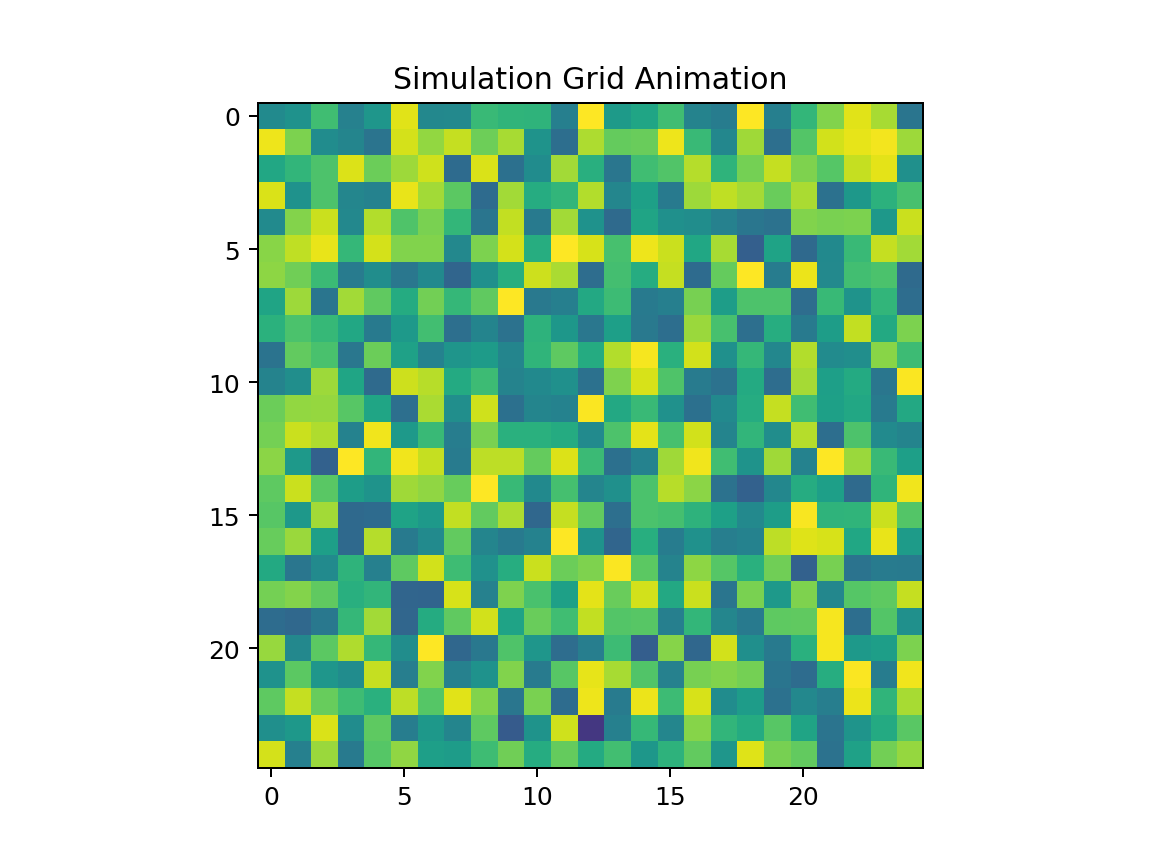

In [42]:
test = SimulationGrid(25)  # Assume that the grid size is 50x50
anim = test.animate(10)  # For example, create an animation that contains 200 frames
plt.show()              